In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("../data/merged_data_clean.csv")
df.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,INDFMPIR,DMDEDUC2,DMDMARTZ,DBQ095Z,DBD100,DRQSPREP,...,DR1TP183,DR1TP184,DR1TP204,DR1TP205,DR1TP225,DR1TP226,DR1_320Z,DR1_330Z,DR1BWATZ,DR1TWSZ
0,109266,2,29,6,5.00,5,3,1.0,1.0,4.0,...,1.423,0.000,0.028,0.004,0.007,0.000,2268.9,2268.9,0.0,1.0
1,109271,1,49,3,NaN,2,3,1.0,2.0,1.0,...,2.115,0.001,0.172,0.011,0.026,0.003,0.0,0.0,0.0,1.0
2,109271,1,49,3,NaN,2,3,1.0,2.0,1.0,...,2.115,0.001,0.172,0.011,0.026,0.003,0.0,0.0,0.0,1.0
3,109271,1,49,3,NaN,2,3,1.0,2.0,1.0,...,2.115,0.001,0.172,0.011,0.026,0.003,0.0,0.0,0.0,1.0
4,109273,1,36,3,0.83,4,3,4.0,NaN,2.0,...,0.328,0.000,0.114,0.005,0.016,0.005,0.0,0.0,0.0,91.0


In [3]:
df.shape

(57438, 146)

In [4]:
df.columns.values

array(['SEQN', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH3', 'INDFMPIR', 'DMDEDUC2',
       'DMDMARTZ', 'DBQ095Z', 'DBD100', 'DRQSPREP', 'DSDANTA', 'DSD128V',
       'DSD128FF', 'DSQTKCAL', 'BMXBMI', 'BPXOSY1', 'BPXOSY2', 'BPXOSY3',
       'BPXODI1', 'BPXODI2', 'BPXODI3', 'BPXOPLS1', 'BPXOPLS2',
       'BPXOPLS3', 'LBXSBU', 'LBXSCA', 'LBXSUA', 'URDACT', 'URDFLOW1',
       'URDFLOW2', 'URDFLOW3', 'LBXGLU', 'URXUPB', 'BPQ020', 'BPQ080',
       'BPQ050A', 'DIQ010', 'DIQ050', 'DIQ070', 'DIQ160', 'DBD895',
       'DBD900', 'DBD905', 'DBD910', 'DBQ700', 'KIQ022', 'KIQ026',
       'KIQ005', 'KIQ010', 'KIQ042', 'KIQ044', 'KIQ046', 'KIQ480',
       'MCQ080', 'MCQ160M', 'MCQ520', 'MCQ550', 'MCQ366A', 'MCQ366B',
       'MCQ366C', 'MCQ366D', 'MCQ160L', 'MCQ300C', 'PAQ605', 'PAQ620',
       'PAQ635', 'PAQ650', 'PAQ665', 'PAD680', 'SMQ020', 'SMQ040',
       'SMD460', 'SMD470', 'ALQ130', 'SLQ050', 'RXDDAYS', 'RXDCOUNT',
       'DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TSUGR', 'DR1TFIBE',
       'DR1TTFAT', 'DR1T

In [5]:
df["KIQ026"].unique()

array([2, 1])

In [6]:
to_cat = ["SEQN", "RIAGENDR", "RIDRETH3", "DMDEDUC2", "DMDMARTZ", "DBQ095Z", "DBD100", "DRQSPREP", "DR1TWSZ", "DSDANTA", "DSD128V", "DSD128FF", "BPQ020", "BPQ080", "BPQ050A", "DIQ010", "DIQ050", "DIQ070", "DIQ160", "DBQ700", "KIQ022", "KIQ026", "KIQ005", "KIQ010", "KIQ042", "KIQ044", "KIQ046", "PAQ605", "PAQ620", "PAQ635", "PAQ650", "PAQ665", "SMQ020", "SMQ040", "SMD460", "SMD470", "SLQ050"]

df = df.apply(lambda x: x.astype("object") if x.name in to_cat else x)
df.reset_index(drop = True, inplace = True)
df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57438 entries, 0 to 57437
Columns: 146 entries, SEQN to DR1TWSZ
dtypes: float64(97), int64(12), object(37)
memory usage: 64.0+ MB


In [7]:
na_dict = {col: (df[col].isna().sum())/len(df) for col in df.drop(columns = "KIQ026")}
na_df = pd.DataFrame(na_dict.items(), columns = ["Feature", "Proportion"])
na_df.to_csv("../results/figures/na_prop.csv", index = False)

In [8]:
## there are less UNIQUE proportions of NAs than there are features, meaning that ...
## many features have the same proportion of NAs
## because the response rate of many features are the same
na_df["Proportion"].unique()

array([0.00000000e+00, 1.28782339e-01, 1.40882343e-01, 4.40770918e-01,
       1.29705073e-01, 9.81580139e-01, 9.87812946e-01, 5.60691528e-01,
       9.52505310e-02, 1.68616595e-01, 1.70792855e-01, 1.73369546e-01,
       2.45499495e-01, 2.47536474e-01, 2.49764964e-01, 1.35554859e-01,
       9.91852084e-02, 1.88603364e-01, 8.70207876e-01, 9.97301438e-01,
       5.63616421e-01, 6.97064661e-01, 3.79069605e-01, 6.70740625e-01,
       5.17061875e-01, 3.67056652e-01, 2.43131725e-01, 2.78561231e-04,
       3.65611616e-04, 1.21504927e-01, 5.43264041e-01, 1.21522337e-01,
       1.21557157e-01, 1.21574567e-01, 1.77582785e-03, 5.31198858e-01,
       6.34423204e-02, 7.68933459e-01, 4.57797973e-01, 1.02110101e-01,
       9.81057836e-02, 1.52512274e-01])

In [9]:
## most common NA proportion
modal_na_prop = na_df["Proportion"].mode()[0]
modal_na_prop

np.float64(0.15251227410425153)

In [10]:
## many features have this proportion - all from same table about dietary data
na_df.loc[na_df["Proportion"] == modal_na_prop, "Feature"].values

array(['DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TSUGR', 'DR1TFIBE',
       'DR1TTFAT', 'DR1TSFAT', 'DR1TMFAT', 'DR1TPFAT', 'DR1TCHOL',
       'DR1TATOC', 'DR1TATOA', 'DR1TRET', 'DR1TVARA', 'DR1TACAR',
       'DR1TBCAR', 'DR1TCRYP', 'DR1TLYCO', 'DR1TLZ', 'DR1TVB1', 'DR1TVB2',
       'DR1TNIAC', 'DR1TVB6', 'DR1TFOLA', 'DR1TFA', 'DR1TFF', 'DR1TFDFE',
       'DR1TCHL', 'DR1TVB12', 'DR1TB12A', 'DR1TVC', 'DR1TVD', 'DR1TVK',
       'DR1TCALC', 'DR1TPHOS', 'DR1TMAGN', 'DR1TIRON', 'DR1TZINC',
       'DR1TCOPP', 'DR1TSODI', 'DR1TPOTA', 'DR1TSELE', 'DR1TCAFF',
       'DR1TTHEO', 'DR1TALCO', 'DR1TMOIS', 'DR1TS040', 'DR1TS060',
       'DR1TS080', 'DR1TS100', 'DR1TS120', 'DR1TS140', 'DR1TS160',
       'DR1TS180', 'DR1TM161', 'DR1TM181', 'DR1TM201', 'DR1TM221',
       'DR1TP182', 'DR1TP183', 'DR1TP184', 'DR1TP204', 'DR1TP205',
       'DR1TP225', 'DR1TP226', 'DR1_320Z', 'DR1_330Z', 'DR1BWATZ'],
      dtype=object)

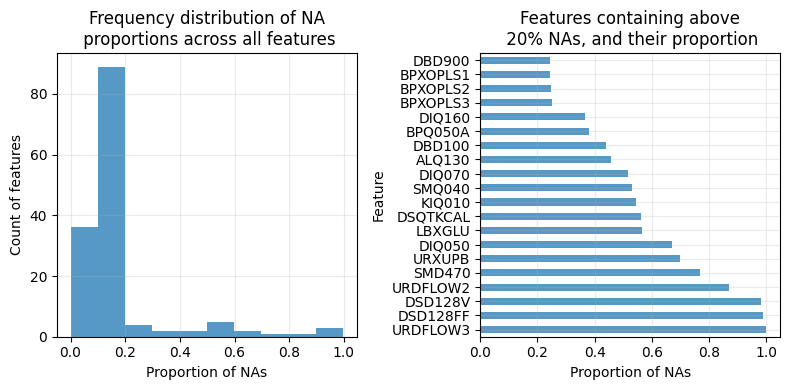

In [11]:
has_na = na_df[na_df["Proportion"] > 0.2].sort_values(by = "Proportion", ascending = False)

fig, ax = plt.subplots(1, 2, figsize = (8, 4), layout = "tight")

ax[0].hist(na_df["Proportion"], bins = 10, alpha = 0.75)
ax[0].set_title("Frequency distribution of NA\n proportions across all features")
ax[0].set_xlabel("Proportion of NAs")
ax[0].set_ylabel("Count of features")
ax[0].grid(alpha = 0.25)

has_na.plot.barh(ax = ax[1], legend = False, alpha = 0.75)
ax[1].set_title("Features containing above\n 20% NAs, and their proportion")
ax[1].set_yticks(range(len(has_na)), has_na["Feature"])
ax[1].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax[1].set_xlabel("Proportion of NAs")
ax[1].set_ylabel("Feature")
ax[1].grid(alpha = 0.25)

plt.savefig("../results/figures/na_prop.png")
plt.show()

In [12]:
dietary_cols = ['DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TSUGR', 'DR1TFIBE',
       'DR1TTFAT', 'DR1TSFAT', 'DR1TMFAT', 'DR1TPFAT', 'DR1TCHOL',
       'DR1TATOC', 'DR1TATOA', 'DR1TRET', 'DR1TVARA', 'DR1TACAR',
       'DR1TBCAR', 'DR1TCRYP', 'DR1TLYCO', 'DR1TLZ', 'DR1TVB1', 'DR1TVB2',
       'DR1TNIAC', 'DR1TVB6', 'DR1TFOLA', 'DR1TFA', 'DR1TFF', 'DR1TFDFE',
       'DR1TCHL', 'DR1TVB12', 'DR1TB12A', 'DR1TVC', 'DR1TVD', 'DR1TVK',
       'DR1TCALC', 'DR1TPHOS', 'DR1TMAGN', 'DR1TIRON', 'DR1TZINC',
       'DR1TCOPP', 'DR1TSODI', 'DR1TPOTA', 'DR1TSELE', 'DR1TCAFF',
       'DR1TTHEO', 'DR1TALCO', 'DR1TMOIS', 'DR1TS040', 'DR1TS060',
       'DR1TS080', 'DR1TS100', 'DR1TS120', 'DR1TS140', 'DR1TS160',
       'DR1TS180', 'DR1TM161', 'DR1TM181', 'DR1TM201', 'DR1TM221',
       'DR1TP182', 'DR1TP183', 'DR1TP184', 'DR1TP204', 'DR1TP205',
       'DR1TP225', 'DR1TP226', 'DR1_320Z', 'DR1_330Z', 'DR1BWATZ']

corr_matrix = df[dietary_cols].corr(method = "pearson").abs()
top_corr = corr_matrix.mean().sort_values(ascending = False).head(20).index
top_corr_matrix = corr_matrix.loc[top_corr, top_corr]

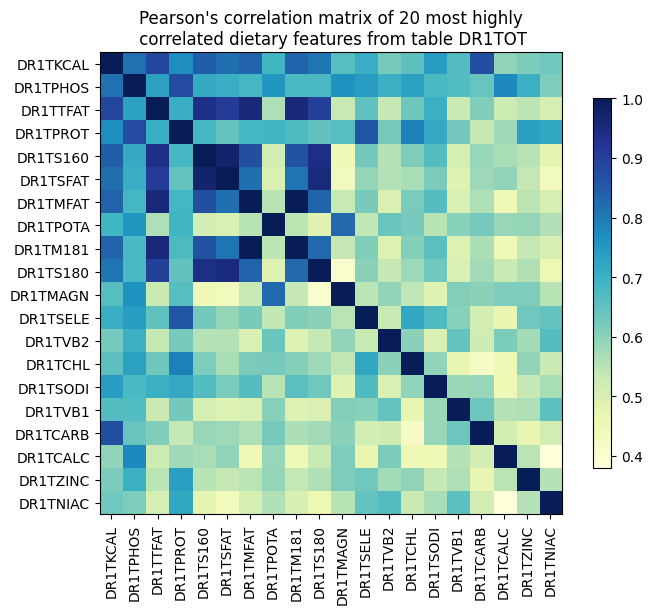

In [13]:
fig, ax = plt.subplots(figsize = (8,6))

plt.imshow(top_corr_matrix, cmap = "YlGnBu")
plt.title("Pearson's correlation matrix of 20 most highly\n correlated dietary features from table DR1TOT")
plt.xticks(range(len(top_corr_matrix)), top_corr_matrix.columns, rotation = 90)
plt.yticks(range(len(top_corr_matrix)), top_corr_matrix.columns)
plt.colorbar(shrink = 0.8)

plt.savefig("../results/figures/dietary_corr.png")
plt.show()

In [14]:
demo_df = df[["KIQ026", "RIAGENDR", "RIDAGEYR", "RIDRETH3", "DMDEDUC2", "DMDMARTZ", "INDFMPIR"]]
demo_map = {
    "KIQ026": {1: "Yes", 2: "No"},
    "RIAGENDR": {1: "Male", 2: "Female"},
    "RIDRETH3": {4: "Black", 6: "Asian", 7: "Other/Multi", 3: "White", 2: "Other\nHispanic", 1: "Mexican\nAmerican"},
    "DMDEDUC2": {1: "< 9th\ngrade", 2: "9-11th\ngrade", 3: "High school\ngrad/GED", 
                 4: "College/\nAA degree", 5: "> College\ngrad", 7: "Refused", 9: "Don't know"},
    "DMDMARTZ": {1: "Married/Living\nwith Partner", 2: "Widowed/Divor-\nced/Separated", 3: "Never married", 77: "Refused", 99: "Don't know"}
}

demo_df = demo_df.apply(lambda x: x.map(demo_map.get(x.name, {})) if x.name in demo_map.keys() else x)
demo_df = demo_df.apply(
    lambda x: pd.Categorical(x, categories = demo_map[x.name].values(), ordered = True) if x.name in demo_map.keys() else x
)

demo_df.rename(columns = {
    "KIQ026": "Kidney stones", 
    "RIAGENDR": "Gender", 
    "RIDAGEYR": "Age", 
    "RIDRETH3": "Race", 
    "DMDEDUC2": "Education level", 
    "DMDMARTZ": "Marital status", 
    "INDFMPIR": "Income ratio"
}, inplace = True)

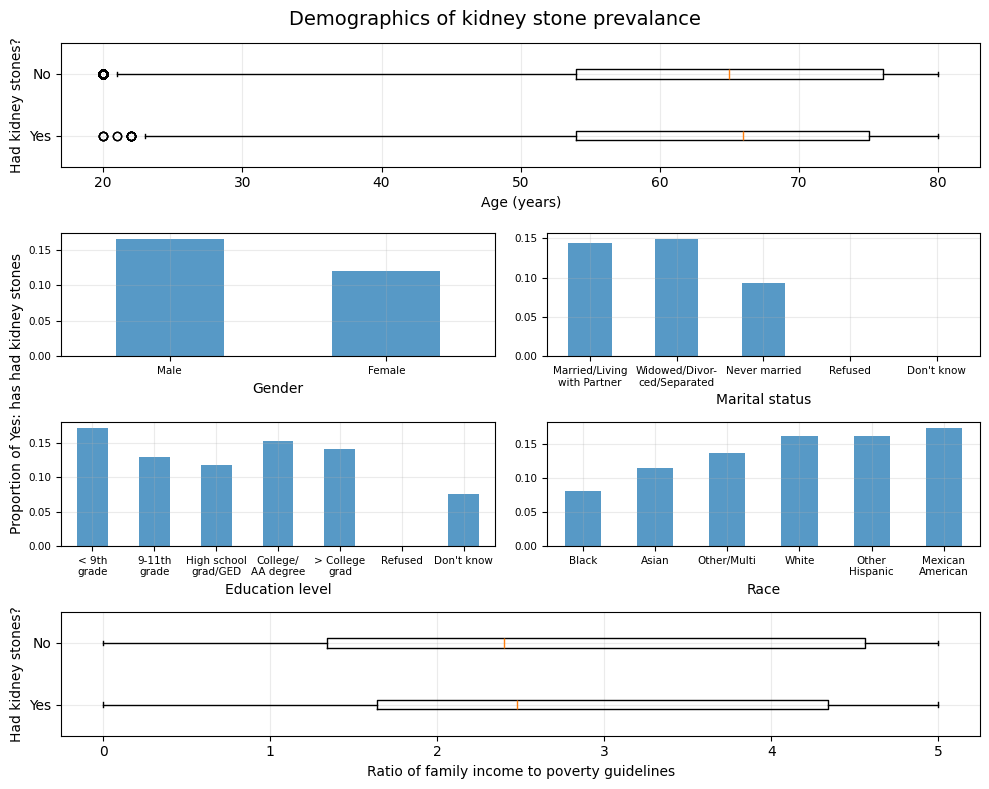

In [15]:
fig = plt.figure(figsize = (10, 8))

ax = [
    plt.subplot(4, 2, (1, 2)),
    plt.subplot(4, 2, 3),
    plt.subplot(4, 2, 4),
    plt.subplot(4, 2, 5),
    plt.subplot(4, 2, 6),
    plt.subplot(4, 2, (7, 8))
]

for i, col in enumerate(demo_df[["Gender", "Marital status", "Education level", "Race"]], 1):
    pd.crosstab(demo_df[col], demo_df["Kidney stones"], normalize = "index")["Yes"].plot(
        kind = "bar", ax = ax[i], rot = 0, stacked = True, legend = False, fontsize = 7.5, alpha = 0.75,
    )
    ax[i].grid(alpha = 0.25)

for i, col in zip([0, 5], demo_df[["Age", "Income ratio"]]):
    col_groupby = demo_df[col].groupby(demo_df["Kidney stones"], observed = False).apply(lambda x: x.dropna().tolist())
    ax[i].boxplot(col_groupby, vert = False)
    ax[i].set_yticks([1,2], col_groupby.index)
    ax[i].grid(alpha = 0.25)
    ax[i].set_ylabel("Had kidney stones?")

ax[0].set_xlabel("Age (years)")
ax[5].set_xlabel("Ratio of family income to poverty guidelines")

plt.suptitle("Demographics of kidney stone prevalance", fontsize = 14)
fig.text(0.015, 0.5, "Proportion of Yes: has had kidney stones", fontsize = 10, va = "center", rotation = 90)
fig.tight_layout()

plt.savefig("../results/figures/demo_ks_prev.png")
plt.show()

In [281]:
cond_cols = ["BPQ020", "BPQ080", "DIQ010", "DIQ160", "KIQ022", "MCQ080", "MCQ160M", "MCQ550", "MCQ160L"]
cond_df = pd.DataFrame({col: pd.crosstab(df["KIQ026"], df[col], normalize = "columns")[1] for col in cond_cols})
cond_df.rename(columns = {
    "BPQ020": "High blood pressure",
    "BPQ080": "High cholesterol",
    "DIQ010": "Diabetes",
    "DIQ160": "Prediabetes",
    "KIQ022": "Weak/failing kidneys",
    "MCQ080": "Overweight",
    "MCQ160M": "Thyroid problem",
    "MCQ550": "Gallstones",
    "MCQ160L": "Liver condition"
}, inplace = True)
cond_df = cond_df.T

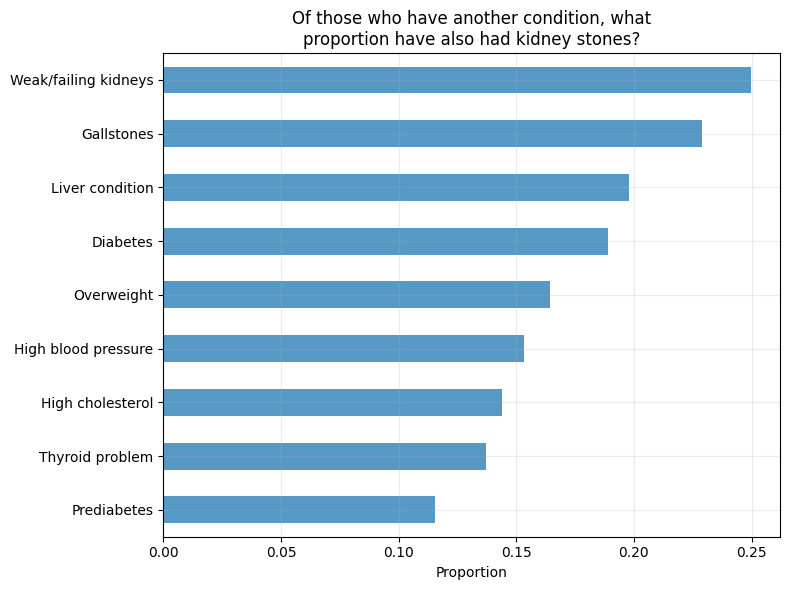

In [284]:
fig, ax = plt.subplots(figsize = (8,6))

cond_df[1].sort_values().plot.barh(ax = ax, alpha = 0.75)
ax.set_title("Of those who have another condition, what\nproportion have also had kidney stones?")
ax.grid(alpha = 0.25)
ax.set_xlabel("Proportion")

plt.tight_layout()
plt.savefig("../results/figures/cond_ks_prop.png")
plt.show()

In [280]:
plt.close("all")